#Projeto NLP

##Nome: Luiz Henrique da Silva Gonçalves
##Matricula: 2018054559

##Objetivo: O objetivo principal deste projeto é implementar um detector de fake news utilizando o modelo pré-treinado BERT e empregando a técnica de transferência de aprendizado, conhecida como fine-tuning. A abordagem de fine-tuning permite adaptar um modelo já treinado em grandes conjuntos de dados para uma tarefa específica, otimizando assim seu desempenho em uma aplicação particular, nesse caso vamos utlizar o BERTimba Base  que é um modelo BERT pré-treinado para português.

##**Passo a Passo de execução**


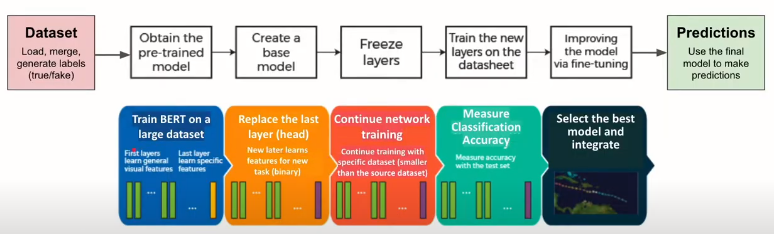

##**Fine-tuning:** Ajuste fino, refere-se à prática de pegar um modelo de aprendizado de máquina pré-treinado em grandes conjuntos de dados e, em seguida, adaptá-lo para uma tarefa específica ou domínio mais estreito.


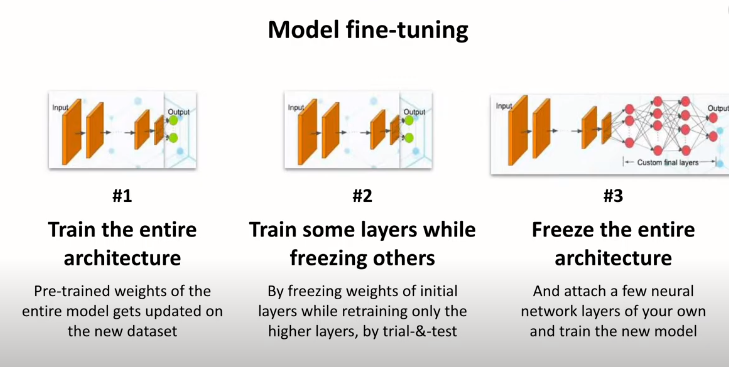





## Setup Environment

In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s et

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.2.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.2 which is incompatible.


In [ ]:
!pip install -U scikit-learn==0.23.2 --no-build-isolation


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
!pip install scikit-learn==0.23.2


  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads


In [ ]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

In [ ]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set Working Directory - if working on Google Drive
%cd /content/drive/MyDrive/nlp/projeto/Project11_FakeNewsDetection

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/nlp/projeto/Project11_FakeNewsDetection


## Load Dataset

In [ ]:
# Load Dataset
data = pd.read_csv('dataset_50_palavras.csv')

# See how the data looks like
print(data.shape)
data.head()

(6853, 11)


,Unnamed: 0,ID,fake_news,text,author,average_word_length,category,date_publication,link,percent_speeling_errors,number_words
0,0,1,1,kátia abreu diz vai colocar expulsão moldura r...,mrk,4.40541,politica,2017-11-30,https://ceticismopolitico.com/2017/11/30/katia...,0.000000,99
1,1,2,1,blog esquerdista dá entender reclamar dedada f...,None,4.40333,sociedade_cotidiano,2017-11-28,https://ceticismopolitico.com/2017/11/28/blog-...,0.013333,168
2,2,3,1,alckmin diz psdb desembarca explica utilizará ...,None,4.79911,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/alckm...,0.000000,128
3,3,4,1,cara pau limites zé celso aciona mp contra sil...,None,4.60825,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/cara-...,0.003436,171
4,4,5,1,temer resolve problema luislinda liberdade ain...,None,4.91729,politica,2017-11-27,https://ceticismopolitico.com/2017/11/27/temer...,0.000000,82


In [ ]:
data.head()

,Unnamed: 0,ID,fake_news,text,author,average_word_length,category,date_publication,link,percent_speeling_errors,number_words
0,0,1,1,kátia abreu diz vai colocar expulsão moldura r...,mrk,4.40541,politica,2017-11-30,https://ceticismopolitico.com/2017/11/30/katia...,0.000000,99
1,1,2,1,blog esquerdista dá entender reclamar dedada f...,None,4.40333,sociedade_cotidiano,2017-11-28,https://ceticismopolitico.com/2017/11/28/blog-...,0.013333,168
2,2,3,1,alckmin diz psdb desembarca explica utilizará ...,None,4.79911,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/alckm...,0.000000,128
3,3,4,1,cara pau limites zé celso aciona mp contra sil...,None,4.60825,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/cara-...,0.003436,171
4,4,5,1,temer resolve problema luislinda liberdade ain...,None,4.91729,politica,2017-11-27,https://ceticismopolitico.com/2017/11/27/temer...,0.000000,82


In [ ]:
data['Target'] = data['fake_news'].apply(lambda x: True if x == 0 else False)
data.head()

,Unnamed: 0,ID,fake_news,text,author,average_word_length,category,date_publication,link,percent_speeling_errors,number_words,Target
0,0,1,1,kátia abreu diz vai colocar expulsão moldura r...,mrk,4.40541,politica,2017-11-30,https://ceticismopolitico.com/2017/11/30/katia...,0.000000,99,False
1,1,2,1,blog esquerdista dá entender reclamar dedada f...,None,4.40333,sociedade_cotidiano,2017-11-28,https://ceticismopolitico.com/2017/11/28/blog-...,0.013333,168,False
2,2,3,1,alckmin diz psdb desembarca explica utilizará ...,None,4.79911,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/alckm...,0.000000,128,False
3,3,4,1,cara pau limites zé celso aciona mp contra sil...,None,4.60825,politica,2017-11-28,https://ceticismopolitico.com/2017/11/28/cara-...,0.003436,171,False
4,4,5,1,temer resolve problema luislinda liberdade ain...,None,4.91729,politica,2017-11-27,https://ceticismopolitico.com/2017/11/27/temer...,0.000000,82,False


([<matplotlib.patches.Wedge at 0x788bc55f2f50>,
 [Text(-1.196249912214393, 0.09479529274735966, 'Fake'),
  Text(1.196249912214393, -0.09479529274735979, 'True')],
 [Text(-0.6978124487917291, 0.05529725410262647, '47.5%'),
  Text(0.6978124487917291, -0.05529725410262654, '52.5%')])

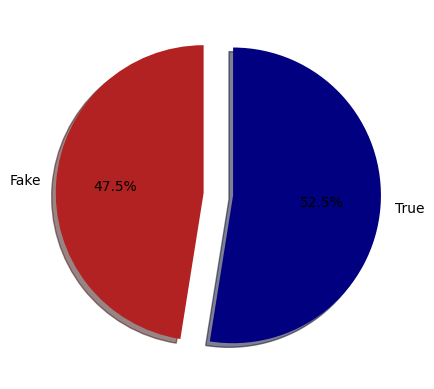

In [ ]:
# Checking if our data is well balanced
label_size = [data['fake_news'].sum(),len(data['fake_news'])-data['fake_news'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

## Train-test-split

In [ ]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'], data['fake_news'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

## BERT Fine-tuning

### Load pretrained BERT Model

In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
#bert = AutoModelForPreTraining.from_pretrained('neuralmind/bert-base-portuguese-cased')
#tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)


In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')
tokenizer = BertTokenizerFast.from_pretrained('neuralmind/bert-base-portuguese-cased')

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

### Prepare Input Data

Text(0, 0.5, 'Number of texts')

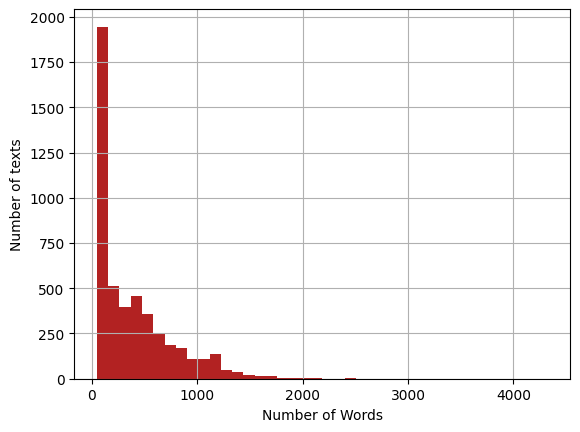

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
# Majority of the news above have word length under 50. So, we set max title length as 15
MAX_LENGHT = 50
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

### Freeze Layers

In [ ]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

### Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

### Define Train & Evaluate Function

In [ ]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Model training

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    150.
  Batch   100  of    150.

Evaluating...

Training Loss: 0.686
Validation Loss: 0.679

 Epoch 2 / 2
  Batch    50  of    150.
  Batch   100  of    150.

Evaluating...

Training Loss: 0.676
Validation Loss: 0.668


### Model performance

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.59      0.91      0.72       540
           1       0.76      0.30      0.43       488

    accuracy                           0.62      1028
   macro avg       0.68      0.61      0.58      1028
weighted avg       0.67      0.62      0.58      1028



## Fake News Predictions

In [ ]:
# # load weights of best model
# path = 'c1_fakenews_weights.pt'
# model.load_state_dict(torch.load(path))

In [ ]:
# testing on unseen data
unseen_news_text = ["Um vazamento de documentos revela que políticos de todas as nações concordaram secretamente em unir forças para construir uma colônia em Marte, onde pretendem se mudar e governar como uma elite interplanetária, deixando a Terra para o restante da população.",
                    "Após meses de negociações, líderes de diferentes nações concordam em implementar medidas conjuntas para enfrentar desafios globais, como mudanças climáticas e crises humanitárias, destacando a importância da cooperação internacional para resolver questões prementes.",
                   "As inovações tecnológicas recentes têm impulsionado avanços significativos na medicina, permitindo o desenvolvimento de tratamentos mais eficazes e acessíveis. Essas conquistas destacam o papel crucial da ciência e da colaboração global na melhoria da qualidade de vida.",
                    "Um grupo secreto de cientistas afirma ter desenvolvido uma pílula milagrosa que pode curar instantaneamente todas as formas de câncer, mas as grandes farmacêuticas estão suprimindo essa cura para manter seus lucros inabalados."]

#tests sentences
#fake:"Um grupo secreto de cientistas afirma ter desenvolvido uma pílula milagrosa que pode curar instantaneamente todas as formas de câncer, mas as grandes farmacêuticas estão suprimindo essa cura para manter seus lucros inabalados."
#fake:""Cientistas descobrem que a Terra é plana e que uma raça de unicórnios governa um reino subterrâneo, mas essa informação está sendo encoberta por uma sociedade secreta global para manter a população na ignorância.""
#true: "As inovações tecnológicas recentes têm impulsionado avanços significativos na medicina, permitindo o desenvolvimento de tratamentos mais eficazes e acessíveis. Essas conquistas destacam o papel crucial da ciência e da colaboração global na melhoria da qualidade de vida."
# tokenize and encode sequences in the test set
MAX_LENGHT = 50

tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 0, 0, 1])

#Resultados:

##Ao final do projeto, apresentamos os resultados obtidos, demonstrando como o modelo treinado é capaz de realizar previsões em dados não vistos, identificando potenciais notícias falsas com base no contexto das reportagens.Apesar de que as metricas de avaliação não demonstraram um resultado muito adequado, podemos afirmar que para alguns testes de cunho politico o resultado foi um pouco melhor, em ração dos dados de treinamento que eram de sua maioria de teor politico.Para noticias mais gerais, o modelo tambem demontrou certa eficacia, entretanto para noticiais muito expecificas o resultado não foi muito bom, porem como demostrado a cima, uma melhoria seria variar mais o conjunto de dados de treinamento para obter resultados melhores, impulsionando o potencial e capacidade do modelo de distinguir e classificar noticiais de diferentes assuntos.